In [93]:
import pandas as pd
import numpy as np

In [94]:
total_data = pd.read_csv('creditcard.csv') #load the data
display(
    total_data.head()
    ,total_data.shape)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


(284807, 31)

In [95]:
total_data.Time.max()
#Time is in the second form and in two days

172792.0

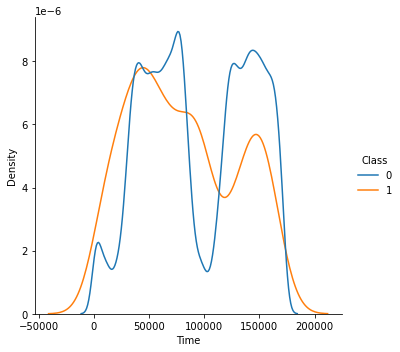

In [96]:
import seaborn as sns
sns.displot(data = total_data, x = 'Time', kind= 'kde',hue= 'Class',common_norm=False)
#Can't find any pattern here

In [97]:
#Let's try change the form of Time
total_data.Time[total_data.Time > 86400] = total_data.Time[total_data.Time > 86400] - 86400

C:\Users\TF2020\AppData\Local\Temp/ipykernel_20348/616030774.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_data.Time[total_data.Time > 86400] = total_data.Time[total_data.Time > 86400] - 86400


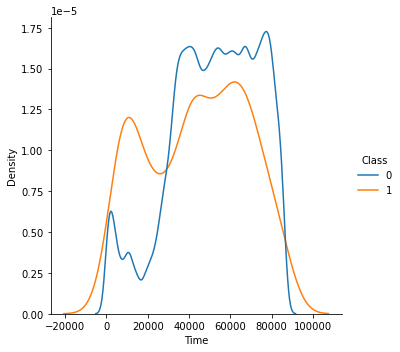

In [98]:
sns.displot(data = total_data, x = 'Time', kind= 'kde',hue= 'Class',common_norm=False)
#there are something suspicous in early morning, model could catch this pattern

In [99]:
from sklearn.model_selection import train_test_split

In [100]:
train_data, test_data = train_test_split(total_data, test_size= 0.3, train_size=0.7, random_state= 1, stratify= total_data.Class)

In [101]:
from sklearn.preprocessing import RobustScaler
scale_temp = train_data.drop(columns = 'Class')
scaler = RobustScaler(quantile_range=(5, 95)).fit(scale_temp)
scale_train = pd.DataFrame(scaler.transform(scale_temp))
scale_train.index = scale_temp.index
scale_train.columns = scale_temp.columns
scale_train = pd.concat([train_data.Class, scale_train], axis = 1)

scale_train.head()



,Class,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
105644,0,0.216337,0.224222,-0.192178,0.117613,0.018179,-0.113831,0.346515,-0.328307,0.232637,...,-0.441192,-0.289551,-0.035192,0.203166,-0.326843,0.044666,0.354703,0.106043,-0.011470,-0.057269
139790,0,0.406173,-0.363184,0.279084,0.262453,-0.076225,-0.311940,0.161805,0.014785,0.497559,...,-0.026086,-0.018034,-0.086281,-0.157005,-0.221042,0.311455,0.217553,-0.055376,-0.122844,0.326517
158758,0,-0.396136,-0.141425,0.162894,0.547521,0.499256,0.011332,0.191589,0.187719,-0.370887,...,0.312409,0.020967,0.206138,-0.240812,0.021647,-0.296830,1.692874,-1.355734,-0.911368,0.038698
130845,0,0.352050,0.233980,-0.147003,0.129145,-0.198623,-0.209168,0.091422,-0.292332,0.147662,...,-0.075489,0.065732,0.149902,-0.043303,-0.167955,0.255650,-0.370334,0.126262,0.010330,-0.057269
88908,0,0.115668,0.224739,0.011199,0.135712,0.266896,-0.143505,-0.019425,-0.070382,0.028287,...,-0.083202,-0.159535,-0.204463,0.060014,0.235571,0.270734,-0.310206,0.037903,0.011873,-0.039270


In [102]:
scale_temp = test_data.drop(columns = 'Class')
scale_test = pd.DataFrame(scaler.transform(scale_temp))
scale_test.index = scale_temp.index
scale_test.columns = scale_temp.columns
scale_test = pd.concat([test_data.Class, scale_test], axis = 1)

x_test = scale_test.drop(columns= 'Class')
y_test = scale_test.Class
x_test

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
31773,-0.241483,-0.238605,0.106336,0.099993,-0.350315,-0.063803,-0.010083,-0.155280,-1.471421,-0.489827,...,0.432611,-0.872548,0.540419,-0.246815,0.026736,0.149150,-0.074561,0.118029,0.127345,0.223623
117430,0.286122,-0.272057,0.340022,0.075069,0.257291,-0.060849,0.151360,-0.115499,0.589052,-0.173028,...,-0.042039,0.113387,0.092355,-0.118508,-0.171098,-0.061928,-0.108283,0.058312,0.033477,-0.015054
274383,0.353944,0.417537,-0.074614,-0.391110,-0.191942,0.123356,-0.030374,0.011492,-0.102152,0.120529,...,0.000492,-0.215478,-0.294654,0.343933,0.115833,-0.213235,0.351687,-0.127611,-0.145893,-0.049088
216704,0.003041,0.393861,-0.129233,-0.102740,0.052133,-0.184117,-0.074462,-0.203258,-0.090759,0.392334,...,-0.028374,0.269102,0.464944,0.081760,0.011957,-0.056948,0.144077,0.026207,-0.087633,-0.008290
245854,0.173634,0.418045,0.020285,-0.495536,0.080588,0.180083,-0.105981,0.065257,-0.124607,0.262019,...,-0.120005,-0.349143,-0.449647,0.176573,-0.625585,-0.020202,-0.284229,-0.000063,-0.080281,-0.046388
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77982,0.046118,-0.208994,0.713890,-0.658089,0.323761,0.066282,-0.321786,0.074995,0.232804,0.169641,...,0.183202,-0.142184,-0.060381,0.318283,-0.021458,-0.329778,-0.269921,-0.882329,-1.154971,-0.057978
148012,-0.706534,-0.107072,0.137250,0.127360,-0.189680,0.414593,0.284727,0.316542,0.056599,-0.015279,...,-0.125267,-0.094293,-0.035729,0.061425,-0.705302,-0.494776,0.189920,-0.198918,-0.170412,-0.054569
241018,0.144713,0.400003,0.045120,-0.571356,0.154015,0.175110,-0.132959,0.027399,-0.086160,0.167216,...,-0.052556,0.028915,0.124266,-0.108383,-0.336827,0.131457,0.487942,-0.056372,-0.066861,-0.026426
112976,0.261266,0.249764,0.087022,0.065997,0.217489,0.015754,0.012636,-0.005921,-0.087345,-0.004883,...,0.049413,-0.189606,-0.268545,0.000595,-0.248489,0.277759,-0.313878,0.054253,0.032963,-0.038998


In [103]:
#The data is quite big
np.random.seed(1)
train_dat_temp = scale_train.reset_index(drop = True)
class_1 = np.where(train_dat_temp.Class == 1)[0]
class_0 = np.where(train_dat_temp.Class == 0)[0]
slicer = np.random.choice(class_0, 5000, replace = False)
train_data_shrink = pd.concat([train_dat_temp.loc[class_1], train_dat_temp.loc[slicer]])
train_data_shrink.shape
x_train = train_data_shrink.drop(columns= 'Class')
y_train = train_data_shrink.Class

In [104]:
#dataset is imbalanced, we could creat a smote set just in case(many model do supoort weight feature)
from imblearn.over_sampling import ADASYN

ada = ADASYN(sampling_strategy="auto", random_state=1, n_neighbors=5, n_jobs=5)
x_train_balanced, y_train_balanced = ada.fit_resample(x_train,y_train)
x_train_balanced

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-0.000567,-0.414729,0.399277,-0.574279,-0.116672,-0.537466,0.021413,-1.079607,-0.874694,-0.153746,...,0.637332,-0.664713,0.223165,-0.712478,-0.317841,0.068935,-0.452979,0.754990,0.279398,0.654152
1,-0.674959,-1.029557,0.943782,-0.905152,0.041965,-0.297018,0.409965,-1.067836,-4.576112,0.377665,...,-1.967952,7.955848,-1.269583,1.145670,-0.099177,0.323775,-0.274487,1.176450,0.944874,0.652379
2,-0.088752,0.101324,0.388209,-0.979922,0.755817,-0.254885,-0.050407,-0.677167,0.451882,-0.421430,...,0.491166,0.843432,0.528970,0.483371,0.220192,-0.326754,-0.034286,0.334659,-0.130015,0.295101
3,-0.204130,0.375957,0.266980,-0.418062,0.879358,0.282022,0.057452,-0.041618,0.021940,-0.187578,...,-0.065041,0.222886,0.328422,-0.026085,0.145410,0.081295,0.205296,0.037714,0.042728,-0.051215
4,-0.373492,-4.676652,3.548576,-5.705402,1.317663,-4.551585,-0.932497,-6.010709,8.105289,-1.072492,...,1.214950,1.722217,-0.769412,-1.075023,0.050800,1.003641,-0.104270,1.847753,0.743679,0.212687
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10006,-0.042433,-1.954416,1.923375,-2.921110,0.896927,-1.993403,-0.673271,-2.881268,3.566413,-0.666111,...,0.644499,0.917511,-0.383067,0.001082,-0.042735,0.347838,-0.127943,1.410703,0.366125,0.212687
10007,-0.130417,-1.468808,1.676225,-2.247955,1.035750,-1.561530,-0.509209,-2.574206,2.685658,-1.051084,...,0.472874,0.992385,-0.374928,0.089630,-0.074781,0.149675,-0.071904,1.000456,0.372452,0.226225
10008,-0.044525,-1.777040,1.828352,-2.761295,0.888906,-1.841401,-0.663292,-2.751549,3.277485,-0.675082,...,0.630245,0.910799,-0.350703,0.042307,-0.044907,0.301964,-0.128514,1.452671,0.382808,0.212687
10009,-0.237358,-1.171662,1.522934,-1.676684,1.226568,-1.252256,-0.338609,-2.463195,2.085003,-1.513639,...,0.276189,1.099587,-0.434560,-0.087825,-0.105774,-0.051004,-0.003579,0.424600,0.363252,0.243219


In [105]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state= 1)
para = {'penalty' : ['l1'], 'C' : np.arange(0,1,0.01), 'solver': ['liblinear']}
grid_search = GridSearchCV(model, param_grid= para, scoring= 'roc_auc', cv= 5, n_jobs= 6)
result = grid_search.fit(x_train_balanced, y_train_balanced)
result.best_estimator_

C:\Users\TF2020\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\TF2020\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\TF2020\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1528, in fit
    self.coef_, self.intercept_, n_iter_ = _fit_liblinear(
  File "C:\Users\TF2020\miniconda3\lib\site-packages\sklearn\svm\_base.py", line 1186, in _fit_liblinear
    raw_coef_, n_iter_ = liblinear.t

LogisticRegression(C=0.06, penalty='l1', random_state=1, solver='liblinear')

In [109]:
from sklearn.feature_selection import SelectFromModel
lasso_logit = LogisticRegression(C=0.06, penalty='l1', random_state=1, solver='liblinear').fit(x_train_balanced, y_train_balanced)
model_temp = SelectFromModel(lasso_logit, prefit= True)
x_train_lasso_blc = pd.DataFrame(model_temp.transform(x_train_balanced))
x_train_lasso_blc.columns = x_train_balanced.columns[model_temp.get_support()]
x_train_lasso_blc.shape

x_test_lasso = x_test.loc[:,model_temp.get_support()]



C:\Users\TF2020\miniconda3\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


,Time,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V16,V20,V22,V23,V24,V25,V26,V27,V28,Amount
31773,-0.241483,0.106336,0.099993,-0.350315,-0.063803,-0.010083,-0.155280,-1.471421,-0.489827,-0.161867,...,0.279528,0.432611,0.540419,-0.246815,0.026736,0.149150,-0.074561,0.118029,0.127345,0.223623
117430,0.286122,0.340022,0.075069,0.257291,-0.060849,0.151360,-0.115499,0.589052,-0.173028,-0.054205,...,-0.252373,-0.042039,0.092355,-0.118508,-0.171098,-0.061928,-0.108283,0.058312,0.033477,-0.015054
274383,0.353944,-0.074614,-0.391110,-0.191942,0.123356,-0.030374,0.011492,-0.102152,0.120529,-0.001508,...,0.010350,0.000492,-0.294654,0.343933,0.115833,-0.213235,0.351687,-0.127611,-0.145893,-0.049088
216704,0.003041,-0.129233,-0.102740,0.052133,-0.184117,-0.074462,-0.203258,-0.090759,0.392334,-0.053997,...,-0.008448,-0.028374,0.464944,0.081760,0.011957,-0.056948,0.144077,0.026207,-0.087633,-0.008290
245854,0.173634,0.020285,-0.495536,0.080588,0.180083,-0.105981,0.065257,-0.124607,0.262019,-0.172279,...,0.093713,-0.120005,-0.449647,0.176573,-0.625585,-0.020202,-0.284229,-0.000063,-0.080281,-0.046388
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77982,0.046118,0.713890,-0.658089,0.323761,0.066282,-0.321786,0.074995,0.232804,0.169641,0.042161,...,0.164496,0.183202,-0.060381,0.318283,-0.021458,-0.329778,-0.269921,-0.882329,-1.154971,-0.057978
148012,-0.706534,0.137250,0.127360,-0.189680,0.414593,0.284727,0.316542,0.056599,-0.015279,-0.175891,...,-0.545304,-0.125267,-0.035729,0.061425,-0.705302,-0.494776,0.189920,-0.198918,-0.170412,-0.054569
241018,0.144713,0.045120,-0.571356,0.154015,0.175110,-0.132959,0.027399,-0.086160,0.167216,-0.273931,...,0.220071,-0.052556,0.124266,-0.108383,-0.336827,0.131457,0.487942,-0.056372,-0.066861,-0.026426
112976,0.261266,0.087022,0.065997,0.217489,0.015754,0.012636,-0.005921,-0.087345,-0.004883,0.021611,...,0.183585,0.049413,-0.268545,0.000595,-0.248489,0.277759,-0.313878,0.054253,0.032963,-0.038998


In [56]:
#XGBoost Tuning Parameter
from itertools import product
import xgboost as xgb

def expand_grid(dictionary):
   return pd.DataFrame([row for row in product(*dictionary.values())], 
                       columns=dictionary.keys())

xgb_para = {
    'objective' : ['binary:logistic'], 
    'eval_metric': ['auc'], 
    'gpu_id' : [0], 
    'tree_method' : ['gpu_hist'],
    'eta' : [0.3], 
    'max_depth' : [9],
    'min_child_weight' : [4], 
    'gamma' : [0], 
    'subsample': [0.7], 
    'colsample_bytree': [0.1]

}
expand_para = expand_grid(xgb_para)
xyz = np.arange(0,expand_para.shape[0],1)


bst_auc = pd.DataFrame(columns= ['auc'],index=[xyz])

In [50]:
xgb_train = xgb.DMatrix(data=x_train, label = y_train )

In [57]:
for i in xyz:
    xgb_para = {
    'objective' : 'binary:logistic', 
    'eval_metric': 'auc',
    'gpu_id' : 0, 
    'tree_method' : 'gpu_hist',
    'eta' : expand_para.iloc[i,4], 
    'max_depth' : expand_para.iloc[i,5], 
    'min_child_weight' : expand_para.iloc[i,6],
    'gamma' : expand_para.iloc[i,7], 
    'subsample': expand_para.iloc[i,8], 
    'colsample_bytree':expand_para.iloc[i,9],
    'seed' : 1
    }
    gs_result = xgb.cv(params= xgb_para, 
    dtrain=xgb_train, 
    num_boost_round = 3000, 
    early_stopping_rounds= 100, 
    verbose_eval= 100,
    nfold= 5
    
    )
    bst_auc.auc[i] = gs_result['test-auc-mean'].max()

[0]	train-auc:0.91902+0.00609	test-auc:0.91587+0.00727
[100]	train-auc:0.99955+0.00008	test-auc:0.97879+0.00447
[200]	train-auc:0.99992+0.00003	test-auc:0.98245+0.00490
[300]	train-auc:0.99997+0.00001	test-auc:0.98301+0.00550
[370]	train-auc:0.99999+0.00001	test-auc:0.98325+0.00588


In [58]:
tuning_result = pd.concat([expand_para.reset_index(drop=True),bst_auc.reset_index(drop=True)],axis=1)
tuning_result.sort_values(by = 'auc', ascending = False)

,objective,eval_metric,gpu_id,tree_method,eta,max_depth,min_child_weight,gamma,subsample,colsample_bytree,auc
0,binary:logistic,auc,0,gpu_hist,0.3,9,4,0,0.7,0.1,0.983892


In [59]:
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

In [79]:
name = ('logistic_regression', 'random_forest', 'xgboost')
balanced_name = ('logistic_regression_balanced', 'random_forest_balanced', 'xgboost_balanced')
lasso_name = ('logistic_regression_lasso', 'random_forest_lasso', 'xgboost_lasso')

positive_label = 1
scoring_metric = 'roc_auc'
classifier = [
              LogisticRegression(solver= 'liblinear', random_state= 1),
              RandomForestClassifier(random_state = 1),
              XGBClassifier(random_state = 1)
              ]

ml_para = [{'penalty' : ['l1','l2'], 'C' : np.arange(0,1,0.01)},
           {'criterion' : ['gini', 'entropy'], 'max_depth' : [1,3,5,7], 'max_features': [None, 'sqrt', 'log2'], 
           'n_estimators': [50,100, 300, 500]},
           {'learning_rate' : [0.3], 
           'n_estimators': [370],
           'max_depth' : [9],
           'min_child_weight' : [4], 
           'gamma' : [0], 
           'subsample': [0.7], 
           'colsample_bytree': [0.1]}]


for i,ml_model in enumerate(classifier): 
    print('working on ' + name[i])
    grid_search = GridSearchCV(
        estimator= ml_model,
        param_grid= ml_para[i],
        cv = 5,
        scoring= scoring_metric,
        n_jobs= 6
    )

    model_fit = grid_search.fit(x_train, y_train)
    print(model_fit.best_params_) # relative the best parameter for imbalanced model
    model_balanced_fit = grid_search.fit(x_train_balanced, y_train_balanced)
    print(model_balanced_fit.best_params_) # relative the best parameter for balanced model
    model_lasso_balanced_fit = grid_search.fit(x_train_lasso_blc, y_train_balanced)
    print(model_lasso_balanced_fit.best_params_) # relative the best parameter for balanced model

working on logistic_regression


C:\Users\TF2020\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 1000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\TF2020\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\TF2020\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1528, in fit
    self.coef_, self.intercept_, n_iter_ = _fit_liblinear(
  File "C:\Users\TF2020\miniconda3\lib\site-packages\sklearn\svm\_base.py", line 1186, in _fit_liblinear
    raw_coef_, n_iter_ = liblinea

{'C': 0.48, 'penalty': 'l1'}


C:\Users\TF2020\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 1000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\TF2020\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\TF2020\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1528, in fit
    self.coef_, self.intercept_, n_iter_ = _fit_liblinear(
  File "C:\Users\TF2020\miniconda3\lib\site-packages\sklearn\svm\_base.py", line 1186, in _fit_liblinear
    raw_coef_, n_iter_ = liblinea

{'C': 0.23, 'penalty': 'l2'}


C:\Users\TF2020\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 1000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\TF2020\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\TF2020\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1528, in fit
    self.coef_, self.intercept_, n_iter_ = _fit_liblinear(
  File "C:\Users\TF2020\miniconda3\lib\site-packages\sklearn\svm\_base.py", line 1186, in _fit_liblinear
    raw_coef_, n_iter_ = liblinea

{'C': 0.22, 'penalty': 'l2'}
working on random_forest
{'criterion': 'entropy', 'max_depth': 7, 'max_features': None, 'n_estimators': 500}
{'criterion': 'gini', 'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 50}
{'criterion': 'entropy', 'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 50}
working on xgboost


C:\Users\TF2020\miniconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:00:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
{'colsample_bytree': 0.1, 'gamma': 0, 'learning_rate': 0.3, 'max_depth': 9, 'min_child_weight': 4, 'n_estimators': 370, 'subsample': 0.7}


C:\Users\TF2020\miniconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:00:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
{'colsample_bytree': 0.1, 'gamma': 0, 'learning_rate': 0.3, 'max_depth': 9, 'min_child_weight': 4, 'n_estimators': 370, 'subsample': 0.7}


C:\Users\TF2020\miniconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:00:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
{'colsample_bytree': 0.1, 'gamma': 0, 'learning_rate': 0.3, 'max_depth': 9, 'min_child_weight': 4, 'n_estimators': 370, 'subsample': 0.7}


In [146]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import roc_auc_score

name = ('logistic_regression', 'random_forest', 'xgboost')
balanced_name = ('logistic_regression_balanced', 'random_forest_balanced', 'xgboost_balanced')

positive_label = 1
scoring_metric = 'roc_auc'
classifier = [
              LogisticRegression(solver= 'liblinear', random_state= 1),
              RandomForestClassifier(random_state = 1),
              XGBClassifier(random_state = 1)
              ]

ml_para = [{'C': [0.48], 'penalty': ['l1']},
           {'criterion': ['entropy'], 'max_depth': [7], 'max_features': [None], 'n_estimators': [500]},  
           {'colsample_bytree': [0.1], 'gamma': [0], 'learning_rate': [0.3], 'max_depth': [9], 'min_child_weight': [4], 'n_estimators': [370], 'subsample': [0.7]}
           ]

models = []
preds = []
probs = []
BAs = []
AUCs = []
timings = []

#imblanced data
for i,ml_model in enumerate(classifier): 
    print('working on ' + name[i])
    grid_search = GridSearchCV(
        estimator= ml_model,
        param_grid= ml_para[i],
        cv = 5,
        scoring= scoring_metric,
        n_jobs= 6
    )

    model_fit = grid_search.fit(x_train, y_train)
    pred = grid_search.predict(x_test)
    prob = grid_search.predict_proba(x_test)[:, 1]

    models.append(model_fit)
    preds.append(pred)
    probs.append(prob)
    

    BAs.append(balanced_accuracy_score(y_test, pred))
    AUCs.append(roc_auc_score(y_test, prob))
    
    timings.append(model_fit.refit_time_)


#balanced data:

ml_para = [{'C': [0.23], 'penalty': ['l2']},
           {'criterion': ['gini'], 'max_depth': [7], 'max_features': ['sqrt'], 'n_estimators': [50]},  
           {'colsample_bytree': [0.1], 'gamma': [0], 'learning_rate': [0.3], 'max_depth': [9], 'min_child_weight': [4], 'n_estimators': [370], 'subsample': [0.7]}
           ]


for i,ml_model in enumerate(classifier): 
    print('working on ' + balanced_name[i])
    grid_search = GridSearchCV(
        estimator= ml_model,
        param_grid= ml_para[i],
        cv = 5,
        scoring= scoring_metric,
        n_jobs= 6
    )

    model_fit = grid_search.fit(x_train_balanced, y_train_balanced)
    pred = grid_search.predict(x_test)
    prob = grid_search.predict_proba(x_test)[:, 1]

    models.append(model_fit)
    preds.append(pred)
    probs.append(prob)
    

    BAs.append(balanced_accuracy_score(y_test, pred))
    AUCs.append(roc_auc_score(y_test, prob))
    
    timings.append(model_fit.refit_time_)



working on logistic_regression
working on random_forest
working on xgboost


C:\Users\TF2020\miniconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:21:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
working on logistic_regression_balanced
working on random_forest_balanced
working on xgboost_balanced


C:\Users\TF2020\miniconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:21:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [147]:
name = name + balanced_name

In [148]:
Tuning_results = pd.DataFrame({'Classifier': name, 
                        'Balanced Accuracy': BAs, 
                        'AUC': AUCs,
                        'Refit Time': timings}).sort_values(['AUC', 'Balanced Accuracy'], ascending = False)
Tuning_results

,Classifier,Balanced Accuracy,AUC,Refit Time
5,xgboost_balanced,0.947415,0.990924,1.638146
4,random_forest_balanced,0.952255,0.987683,0.958383
0,logistic_regression,0.934943,0.987378,0.028904
2,xgboost,0.938304,0.986255,0.740789
1,random_forest,0.941934,0.986100,39.722671
3,logistic_regression_balanced,0.920723,0.982323,0.069931


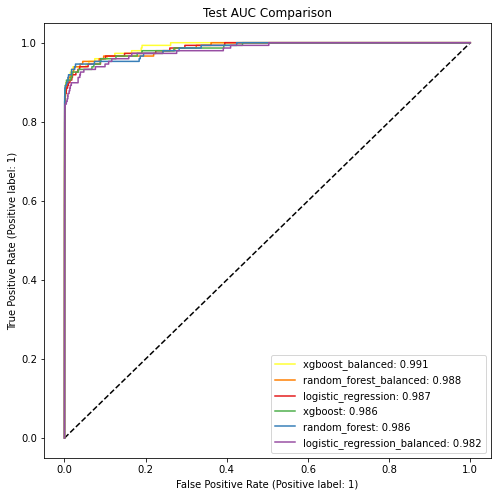

In [149]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, roc_curve, RocCurveDisplay, confusion_matrix, ConfusionMatrixDisplay, classification_report, recall_score, f1_score, accuracy_score
def Custom_ROC_Plot (results, x_test, y_test, title, figwidth = 8, figheight = 8):

    fig, ax = plt.subplots(figsize = (figwidth, figheight))

    ax.plot(ax.get_xlim(), ax.get_ylim(), ls = '--', c = 'k')
    ax.set(title = title)

    for i in results.index:
        RocCurveDisplay.from_estimator(models[i], 
                                       x_test, 
                                       y_test, 
                                       color = cm.Set1(i), 
                                       label = results.loc[i, 'Classifier'] + ': {:.3f}'.format(results.loc[i, 'AUC']), 
                                       ax = ax)
        
    return([fig, ax])

fig, ax = Custom_ROC_Plot(Tuning_results, x_test, y_test, title = 'Test AUC Comparison')

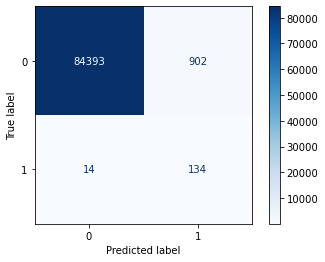

In [127]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
best_index = Tuning_results.index[0]
ConfusionMatrixDisplay.from_estimator(models[best_index], 
                                      x_test, 
                                      y_test,
                                      cmap = plt.cm.Blues,
                                      values_format = 'd')

In [133]:
#Lasso balanced data:
lasso_name = ('logistic_regression_lasso', 'random_forest_lasso', 'xgboost_lasso')
ml_para = [{'C': [0.22], 'penalty': ['l2']},
           {'criterion': ['entropy'], 'max_depth': [7], 'max_features': ['sqrt'], 'n_estimators': [50]},  
           {'colsample_bytree': [0.1], 'gamma': [0], 'learning_rate': [0.3], 'max_depth': [9], 'min_child_weight': [4], 'n_estimators': [370], 'subsample': [0.7]}
           ]
models = []
preds = []
probs = []
BAs = []
AUCs = []
timings = []

for i,ml_model in enumerate(classifier): 
    print('working on ' + lasso_name[i])
    grid_search = GridSearchCV(
        estimator= ml_model,
        param_grid= ml_para[i],
        cv = 5,
        scoring= scoring_metric,
        n_jobs= 6
    )

    model_fit = grid_search.fit(x_train_lasso_blc, y_train_balanced)
    pred = grid_search.predict(x_test_lasso)
    prob = grid_search.predict_proba(x_test_lasso)[:, 1]

    models.append(model_fit)
    preds.append(pred)
    probs.append(prob)
    

    BAs.append(balanced_accuracy_score(y_test, pred))
    AUCs.append(roc_auc_score(y_test, prob))
    
    timings.append(model_fit.refit_time_)
print('its over amigo')

working on logistic_regression_lasso
working on random_forest_lasso
working on xgboost_lasso


C:\Users\TF2020\miniconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:36:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
its over amigo


In [142]:
Tuning_results = pd.DataFrame({'Classifier': lasso_name, 
                        'Balanced Accuracy': BAs, 
                        'AUC': AUCs,
                        'Refit Time': timings}).sort_values(['AUC', 'Balanced Accuracy'], ascending = False)
                        

Tuning_results

x_test_lasso.shape

(85443, 24)

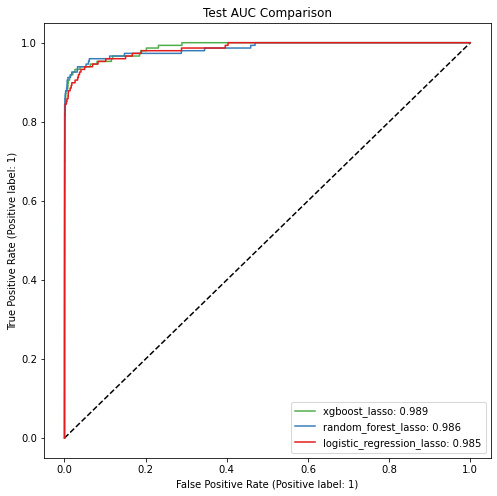

In [144]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, roc_curve, RocCurveDisplay, confusion_matrix, ConfusionMatrixDisplay, classification_report, recall_score, f1_score, accuracy_score

def Custom_ROC_Plot (results, x_test, y_test, title, figwidth = 8, figheight = 8):

    fig, ax = plt.subplots(figsize = (figwidth, figheight))

    ax.plot(ax.get_xlim(), ax.get_ylim(), ls = '--', c = 'k')
    ax.set(title = title)

    for i in results.index:
        RocCurveDisplay.from_estimator(models[i], 
                                       x_test, 
                                       y_test, 
                                       color = cm.Set1(i), 
                                       label = results.loc[i, 'Classifier'] + ': {:.3f}'.format(results.loc[i, 'AUC']), 
                                       ax = ax)
        
    return([fig, ax])



fig, ax = Custom_ROC_Plot(Tuning_results, x_test_lasso, y_test, title = 'Test AUC Comparison')

In [152]:
display(round(accuracy_score(y_test, preds[best_index]), 3), 
        round(balanced_accuracy_score(y_test, preds[best_index]), 3),
        round(recall_score(y_test, preds[best_index], pos_label = 1), 3),
        round(recall_score(y_test, preds[best_index], pos_label = 0), 3))

0.989

0.947

0.905

0.989